# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)
*   [`Headliner_transcriptions_df` Файлы транскрибации записей звонков `Headliner`](https://drive.google.com/file/d/1ThU49xWSv3T-HK61jRykOR3UDvOVeO4i/view?usp=sharing)
*   [`Headliner_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Headliner`](https://drive.google.com/file/d/1-BSmmymyVo8VYyvDXsO1ybXldOJ5eUaH/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

*   [`Headliner_targets_train_df.pkl` Целевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1mXwujIDOQ_wbP68pl60mEkPVm6dYJf9Y/view?usp=sharing)
*   [`Headliner_not_targets_train_df.pkl` Нецелевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-CvhJxwCVooN5_OcXUJAl519m76JOvbN/view?usp=sharing)
*   [`Headliner_moot_train_df.pkl` Спорные звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-KwRSk9Jrf5Get1dwFvHECmb26QDdhRa/view?usp=sharing)

*   [`Headliner_targets_test_df.pkl` Целевые звонки `Headliner` для тестовой выборки](https://drive.google.com/file/d/1-3bxOkIwEoSAXNjzE7wjZ8AhM4Z1-xfN/view?usp=sharing)
*   [`Headliner_not_targets_test_df.pkl` Нецелевые звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-DAv-KEY8APguoXgIgaonsb1fQ4rrMag/view?usp=sharing)
*   [`Headliner_moot_test_df.pkl` Спорные звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-Q-VwKTqoPZohQxBCZRFL-BvZXB7SJhc/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)
*   [`Primavera_transcriptions_df` Файлы транскрибации записей звонков `Primavera`](https://drive.google.com/file/d/1-21AcHmdkRhKmL0uwWOJ0jHyY8sj1tME/view?usp=sharing)
*   [`Primavera_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Primavera`](https://drive.google.com/file/d/1-BtSBVH2JXol5JDA0GKV4NOIz5WUnUd5/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

*   [`Primavera_targets_train_df.pkl` Целевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1WY910LSwTDTf_m7vtFk3z9FqXao0FhZX/view?usp=sharing)
*   [`Primavera_not_targets_train_df.pkl` Нецелевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1-5TvmSizrXJHNXnfdbBafq8CjG65AiMG/view?usp=sharing)

*   [`Primavera_targets_test_df.pkl` Целевые звонки `Primavera` для тестовой выборки](https://drive.google.com/file/d/1-4s9BrHxpT_fzyXe4E03_GqGIFPZf9Io/view?usp=sharing)
*   [`Primavera_not_targets_test_df.pkl` Нецелевые звонки `Primavera`для тестовой выборки](https://drive.google.com/file/d/1-EOHhmMQ7SFhS51_rIh7UCwm68W18twC/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_df` Файлы транскрибации записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-2kqmIGIraP70ekXB6LBqNjwaTnoxyk5/view?usp=sharing)
*   [`Paveletskaya_city_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-EfA8ZCpGNQk__puhiv1FuxoZC0rXxpj/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

*   [`Paveletskaya_city_targets_train_df.pkl` Целевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-E_xfQcc9vaGxEJSiUeiEp5fbxn-1bxZ/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_train_df.pkl` Нецелевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-XqcAK06ppsTLagZGpeXX96e2yhDt-iz/view?usp=sharing)

*   [`Paveletskaya_city_targets_test_df.pkl` Целевые звонки `Paveletskaya_city` для тестовой выборки](https://drive.google.com/file/d/1-VUl5bcPpEoEsQfyEQZyYy_ESrbx-sR1/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_test_df.pkl` Нецелевые звонки `Paveletskaya_city`для тестовой выборки](https://drive.google.com/file/d/1-dCaZZ2NtvODY2KWwsEgwUOhdqD0Szkv/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

*   [`train_df.pkl` Обучающая выборка](https://drive.google.com/file/d/1-nipawwiXKNPeMIE2nxlAOZCVK_5N89B/view?usp=sharing)
*   [`test_df.pkl` Тестовая выборка](https://drive.google.com/file/d/1-sLBh5rMAhVI7ps68eiSMEVfwjB7PNdT/view?usp=sharing)

# 10 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [57]:
# Установка tensorflow-addons
!pip -q install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
import os                        # для работы с операционной системой
import pickle            as pkl  # для сохранения и загрузки переменных
import pandas            as pd   # для работы с таблицами
import numpy             as np   # для работы с массивами
import matplotlib.pyplot as plt  # для прорисовки и визуализации
import tensorflow_addons as tfa  # для дополнительных метрик
import re                        # для работы с регулярными выражениями

from tensorflow.keras.preprocessing.text import Tokenizer                                              # токенайзер
from tensorflow.keras.models             import Model                                                  # класс-конструктор модели нейронной сети
from tensorflow.keras.layers             import Input, Dense, Dropout, BatchNormalization, concatenate # слои
from tensorflow.keras.optimizers         import Adam                                                   # оптимизатор
from tensorflow.keras.callbacks          import ModelCheckpoint, EarlyStopping                         # коллбэки
from tensorflow.keras.utils              import plot_model                                             # для отрисовки архитектуры нейронной сети
from tensorflow.keras.saving             import load_model                                             # для загрузки моделей

from sklearn.model_selection             import train_test_split                                                # для разделения данных на обучающую и тестовую выборки
from sklearn.utils                       import class_weight                                                    # для балансировки классов
from sklearn.metrics                     import confusion_matrix, ConfusionMatrixDisplay, classification_report # для оценки моделей
from sklearn.metrics                     import f1_score, accuracy_score, roc_auc_score, roc_curve              # вычисление метрик f1-score, accuracy, ROC-AUC и ROC-кривая
from sklearn.preprocessing               import LabelEncoder, OneHotEncoder, MinMaxScaler                       # для предобработки данных

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city
preprocessed_data_path     = work_dir_path         + 'Предобработанные данные/'            # путь к предобработанным данным и подготовленным выборкам

## Подготовка табличных данных

In [ ]:
# Загрузка train_df
with open(df_path + 'train_df.pkl', 'rb') as f:
  train_df = pkl.load(f)

# Загрузка test_df
with open(df_path + 'test_df.pkl', 'rb') as f:
  test_df = pkl.load(f)

### Подготовка числовых данных

In [ ]:
# Предобработка 'ID посетителя': избавление от nan, приведение типа и понижение разрядности для более плавной нормализации
train_df['ID посетителя'] = train_df['ID посетителя'].fillna('0')
train_df['ID посетителя'] = train_df['ID посетителя'].astype('float')
train_df['ID посетителя'] = train_df['ID посетителя']/1e8
test_df['ID посетителя']  = test_df['ID посетителя'].fillna('0')
test_df['ID посетителя']  = test_df['ID посетителя'].astype('float')
test_df['ID посетителя']  = test_df['ID посетителя']/1e8

In [ ]:
# Числовые данные
x_numericdata      = train_df[['Чистая длительность разговора','Номер обращения','ID посетителя']].values
x_numericdata_test = test_df[['Чистая длительность разговора','Номер обращения','ID посетителя']].values
print('      x_numericdata:', len(x_numericdata))
print('x_numericdata.shape:', x_numericdata.shape)
print(x_numericdata[:2])
print()
print('      x_numericdata_test:', len(x_numericdata_test))
print('x_numericdata_test.shape:', x_numericdata_test.shape)
print(x_numericdata_test[:2])

      x_numericdata: 6233
x_numericdata.shape: (6233, 3)
[[2. 1. 0.]
 [5. 1. 0.]]

      x_numericdata_test: 691
x_numericdata_test.shape: (691, 3)
[[438.           1.           0.        ]
 [  5.           5.          73.74560722]]


### Подготовка ohe-данных

In [ ]:
# Предобработка: избавление от nan
for column in ['Статус',
               'Тип',
               'Сайт',
               'Тип посетителя',
               'Сценарий',
               'Операции',
               'Тип устройства',
               'Первая рекламная кампания']:
  train_df[column] = train_df[column].fillna('Нет данных')
  test_df[column]  =  test_df[column].fillna('Нет данных')

In [ ]:
# Предобработка: меняем '' на 'Нет данных'
for column in ['Статус',
               'Тип',
               'Сайт',
               'Тип посетителя',
               'Сценарий',
               'Операции',
               'Тип устройства',
               'Первая рекламная кампания']:
  train_df[column] = train_df[column].apply(lambda x: 'Нет данных' if x == '' else x)
  test_df[column]  =  test_df[column].apply(lambda x: 'Нет данных' if x == '' else x)

In [ ]:
# Предобработка: избавляемся от фигурных скобок в столбцах 'Тип посетителя' и 'Первая рекламная кампания'
for column in ['Тип посетителя',
               'Первая рекламная кампания']:
  train_df[column] = train_df[column].str.replace('{', '', regex=False)
  train_df[column] = train_df[column].str.replace('}', '', regex=False)
  test_df[column]  =  test_df[column].str.replace('{', '', regex=False)
  test_df[column]  =  test_df[column].str.replace('}', '', regex=False)

In [ ]:
# Предобработка: обрезаем данные по '.' в столбце 'Сценарий'
train_df['Сценарий'] = train_df['Сценарий'].str.strip('.')
test_df['Сценарий']  =  test_df['Сценарий'].str.strip('.')

In [ ]:
# Предобработка: меняем 'Обработка вызова для колбэка 2023' на 'Обработка вызова 2023 для колбэков'
train_df['Сценарий'] = train_df['Сценарий'].str.replace('Обработка вызова для колбэка 2023', 'Обработка вызова 2023 для колбэков', regex=False)
test_df['Сценарий']  =  test_df['Сценарий'].str.replace('Обработка вызова для колбэка 2023', 'Обработка вызова 2023 для колбэков', regex=False)

In [ ]:
# Преобразуем в ohe
encoders      = {}
ohedata       = []
ohedata_test  = []

for column in ['Статус',
               'Тип',
               'Сайт',
               'Тип посетителя',
               'Сценарий',
               'Операции',
               'Тип устройства',
               'Первая рекламная кампания']:
  encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False)
  encoder.fit(train_df[column].values.reshape(-1, 1))
  encoders[column] = encoder
  ohedata.append(encoder.transform(train_df[column].values.reshape(-1, 1)))
  ohedata_test.append(encoder.transform(test_df[column].values.reshape(-1, 1)))

x_ohedata      = np.hstack(ohedata).astype('float32')
x_ohedata_test = np.hstack(ohedata_test).astype('float32')
print('      x_ohedata:', len(x_ohedata))
print('x_ohedata.shape:', x_ohedata.shape)
print(x_ohedata[:2])
print()
print('      x_ohedata_test:', len(x_ohedata_test))
print('x_ohedata_test.shape:', x_ohedata_test.shape)
print(x_ohedata_test[:2])

      x_ohedata: 6233
x_ohedata.shape: (6233, 131)
[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

      x_ohedata_test: 691
x_ohedata_test.shape: (691, 131)
[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  

In [ ]:
# Сохранение энкодеров
with open(preprocessed_data_path + 'encoders.pkl', 'wb') as f:
  pkl.dump(encoders, f)

## Выборки

In [ ]:
# Загрузка данных
with open(preprocessed_data_path + 'x_textdata_01.pkl', 'rb') as f:
  x_textdata_01 = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)

with open(preprocessed_data_path + 'y_data.pkl', 'rb') as f:
  y_data = pkl.load(f)

with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

with open(preprocessed_data_path + 'class_weights.pkl', 'rb') as f:
  class_weights = pkl.load(f)

In [ ]:
# Разделение на обучающую и проверочную выборки
x_textdata_01_train, x_textdata_01_val, \
x_numericdata_train, x_numericdata_val, \
x_ohedata_train,     x_ohedata_val,     \
y_train,             y_val =            \
train_test_split(x_textdata_01,
                 x_numericdata,
                 x_ohedata,
                 y_data,
                 test_size=0.2,
                 random_state=42,
                 stratify=y_data)

In [ ]:
print('            x_textdata_01:',  x_textdata_01.shape)
print('            x_numericdata:',  x_numericdata.shape)
print('                x_ohedata:',  x_ohedata.shape)
print('                   y_data:',  y_data.shape)

            x_textdata_01: (6233, 35000)
            x_numericdata: (6233, 3)
                x_ohedata: (6233, 131)
                   y_data: (6233,)


In [ ]:
print('            x_textdata_01_train:',  x_textdata_01_train.shape)
print('            x_numericdata_train:',  x_numericdata_train.shape)
print('                x_ohedata_train:',  x_ohedata_train.shape)
print('                        y_train:',  y_train.shape)

            x_textdata_01_train: (4986, 35000)
            x_numericdata_train: (4986, 3)
                x_ohedata_train: (4986, 131)
                        y_train: (4986,)


In [ ]:
print('            x_textdata_01_val:',  x_textdata_01_val.shape)
print('            x_numericdata_val:',  x_numericdata_val.shape)
print('                x_ohedata_val:',  x_ohedata_val.shape)
print('                        y_val:',  y_val.shape)

            x_textdata_01_val: (1247, 35000)
            x_numericdata_val: (1247, 3)
                x_ohedata_val: (1247, 131)
                        y_val: (1247,)


In [ ]:
print('            x_textdata_01_test:',  x_textdata_01_test.shape)
print('            x_numericdata_test:',  x_numericdata_test.shape)
print('                x_ohedata_test:',  x_ohedata_test.shape)
print('                        y_test:',  y_test.shape)

            x_textdata_01_test: (691, 35000)
            x_numericdata_test: (691, 3)
                x_ohedata_test: (691, 131)
                        y_test: (691,)


In [ ]:
# Сохраняем x_textdata_01 в pkl
with open(preprocessed_data_path + 'x_textdata_01.pkl', 'wb') as f:
  pkl.dump(x_textdata_01, f)

# Сохраняем x_textdata_01_train в pkl
with open(preprocessed_data_path + 'x_textdata_01_train.pkl', 'wb') as f:
  pkl.dump(x_textdata_01_train, f)

# Сохраняем x_textdata_01_val в pkl
with open(preprocessed_data_path + 'x_textdata_01_val.pkl', 'wb') as f:
  pkl.dump(x_textdata_01_val, f)

# Сохраняем x_textdata_01_test в pkl
with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'wb') as f:
  pkl.dump(x_textdata_01_test, f)

In [ ]:
# Сохраняем x_numericdata в pkl
with open(preprocessed_data_path + 'x_numericdata.pkl', 'wb') as f:
  pkl.dump(x_numericdata, f)

# Сохраняем x_numericdata_train в pkl
with open(preprocessed_data_path + 'x_numericdata_train.pkl', 'wb') as f:
  pkl.dump(x_numericdata_train, f)

# Сохраняем x_numericdata_val в pkl
with open(preprocessed_data_path + 'x_numericdata_val.pkl', 'wb') as f:
  pkl.dump(x_numericdata_val, f)

# Сохраняем x_numericdata_test в pkl
with open(preprocessed_data_path + 'x_numericdata_test.pkl', 'wb') as f:
  pkl.dump(x_numericdata_test, f)

In [ ]:
# Сохраняем x_ohedata в pkl
with open(preprocessed_data_path + 'x_ohedata.pkl', 'wb') as f:
  pkl.dump(x_ohedata, f)

# Сохраняем x_ohedata_train в pkl
with open(preprocessed_data_path + 'x_ohedata_train.pkl', 'wb') as f:
  pkl.dump(x_ohedata_train, f)

# Сохраняем x_ohedata_val в pkl
with open(preprocessed_data_path + 'x_ohedata_val.pkl', 'wb') as f:
  pkl.dump(x_ohedata_val, f)

# Сохраняем x_ohedata_test в pkl
with open(preprocessed_data_path + 'x_ohedata_test.pkl', 'wb') as f:
  pkl.dump(x_ohedata_test, f)

In [ ]:
# Сохраняем y_data в pkl
with open(preprocessed_data_path + 'y_data.pkl', 'wb') as f:
  pkl.dump(y_data, f)

# Сохраняем y_train в pkl
with open(preprocessed_data_path + 'y_train.pkl', 'wb') as f:
  pkl.dump(y_train, f)

# Сохраняем y_val в pkl
with open(preprocessed_data_path + 'y_val.pkl', 'wb') as f:
  pkl.dump(y_val, f)

# Сохраняем y_test в pkl
with open(preprocessed_data_path + 'y_test.pkl', 'wb') as f:
  pkl.dump(y_test, f)

In [ ]:
# Вычисление весовых коэффициентов классов
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights

array([0.74932372, 1.50271248])

In [ ]:
# Сохраняем class_weights в pkl
with open(preprocessed_data_path + 'class_weights.pkl', 'wb') as f:
  pkl.dump(class_weights, f)

## Нейронная сеть на табличных данных

In [4]:
# Загрузка данных
with open(preprocessed_data_path + 'x_textdata_01_train.pkl', 'rb') as f:
  x_textdata_01_train = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_val.pkl', 'rb') as f:
  x_textdata_01_val = pkl.load(f)

with open(preprocessed_data_path + 'x_textdata_01_test.pkl', 'rb') as f:
  x_textdata_01_test = pkl.load(f)

with open(preprocessed_data_path + 'x_numericdata_train.pkl', 'rb') as f:
  x_numericdata_train = pkl.load(f)

with open(preprocessed_data_path + 'x_numericdata_val.pkl', 'rb') as f:
  x_numericdata_val = pkl.load(f)

with open(preprocessed_data_path + 'x_numericdata_test.pkl', 'rb') as f:
  x_numericdata_test = pkl.load(f)

with open(preprocessed_data_path + 'x_ohedata_train.pkl', 'rb') as f:
  x_ohedata_train = pkl.load(f)

with open(preprocessed_data_path + 'x_ohedata_val.pkl', 'rb') as f:
  x_ohedata_val = pkl.load(f)

with open(preprocessed_data_path + 'x_ohedata_test.pkl', 'rb') as f:
  x_ohedata_test = pkl.load(f)

with open(preprocessed_data_path + 'y_train.pkl', 'rb') as f:
  y_train = pkl.load(f)

with open(preprocessed_data_path + 'y_val.pkl', 'rb') as f:
  y_val = pkl.load(f)

with open(preprocessed_data_path + 'y_test.pkl', 'rb') as f:
  y_test = pkl.load(f)

with open(preprocessed_data_path + 'class_weights.pkl', 'rb') as f:
  class_weights = pkl.load(f)

In [5]:
# Функция для отрисовки графика процесса обучения нейронной сети
def plot_history(history, loss, metric):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  parameters = [loss, metric]
  labels = ['Ошибка', 'Доля верных ответов']
  for i in range(2):
    ax[i].plot(history.history[parameters[i]],          label=labels[i] + ' на обучающей выборке')
    ax[i].plot(history.history['val_' + parameters[i]], label=labels[i] + ' на проверочной выборке')
    ax[i].set_title(labels[i])
    ax[i].legend()
  plt.show()

In [6]:
# Функция для создания модели нейронной сети
def create_model(input_shape):

  input_x1 = Input(shape=(input_shape[0]),
                   name = 'input_x1')
  input_x2 = Input(shape=(input_shape[1]),
                   name = 'input_x2')
  input_x3 = Input(shape=(input_shape[2]),
                   name = 'input_x3')

  x1       = Dense(500, activation = 'relu') (input_x1)
  x1       = BatchNormalization()            (x1)
  x1       = Dropout(0.6)                    (x1)
  x1       = Dense(32,  activation = 'relu') (x1)

  x2       = Dense(48,  activation = 'relu') (input_x2)
  x2       = BatchNormalization()            (x2)
  x2       = Dropout(0.6)                    (x2)
  x2       = Dense(16,  activation = 'relu') (x2)

  x3       = Dense(32,  activation = 'relu') (input_x3)
  x3       = BatchNormalization()            (x3)
  x3       = Dropout(0.6)                    (x3)
  x3       = Dense(16,  activation = 'relu') (x3)

  x        = concatenate([x1, x2, x3])
  x        = BatchNormalization()            (x)
  x        = Dense(16,  activation = 'relu') (x)
  x        = Dropout(0.6)                    (x)

  output   = Dense(1,   activation='sigmoid',
                        name='output')       (x)

  return Model([input_x1, input_x2, input_x3], output)

### Метрика `AUC`

In [7]:
# Создание модели нейронной сети
model = create_model([x_textdata_01_train.shape[1], x_ohedata_train.shape[1], x_numericdata_train.shape[1]])

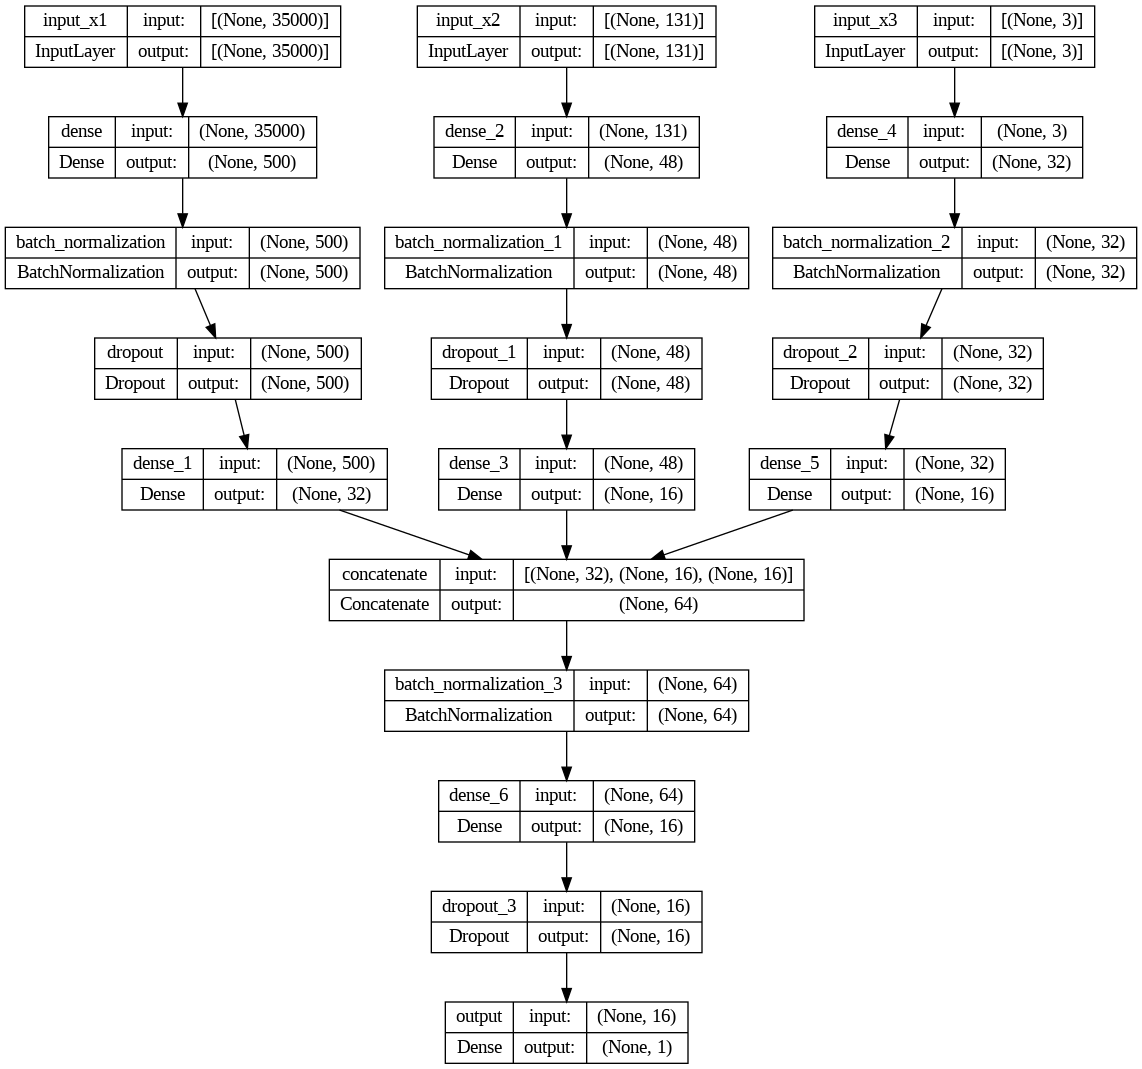

In [8]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [9]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_auc',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_auc',
                                     patience=20)

In [10]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['AUC'])

In [11]:
# Обучение модели нейронной сети
history1 = model.fit({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train}, y_train,
                     validation_data=({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val}, y_val),
                     batch_size=32,
                     epochs=30,
                     verbose=1,
                     shuffle=True,
                     class_weight={0:class_weights[0], 1:class_weights[1]},
                     callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
153/156 [============================>.] - ETA: 0s - loss: 0.6775 - auc: 0.7400
Epoch 1: val_auc improved from -inf to 0.92106, saving model to ./
156/156 [==============================] - 14s 25ms/step - loss: 0.6763 - auc: 0.7406 - val_loss: 0.5864 - val_auc: 0.9211
Epoch 2/30
153/156 [============================>.] - ETA: 0s - loss: 0.4800 - auc: 0.8602
Epoch 2: val_auc improved from 0.92106 to 0.94039, saving model to ./
156/156 [==============================] - 4s 24ms/step - loss: 0.4799 - auc: 0.8605 - val_loss: 0.4517 - val_auc: 0.9404
Epoch 3/30
154/156 [============================>.] - ETA: 0s - loss: 0.4354 - auc: 0.8887
Epoch 3: val_auc improved from 0.94039 to 0.94960, saving model to ./
156/156 [==============================] - 5s 34ms/step - loss: 0.4352 - auc: 0.8887 - val_loss: 0.3321 - val_auc: 0.9496
Epoch 4/30
154/156 [============================>.] - ETA: 0s - loss: 0.3916 - auc: 0.9097
Epoch 4: val_auc improved from 0.94960 to 0.95332, saving mode

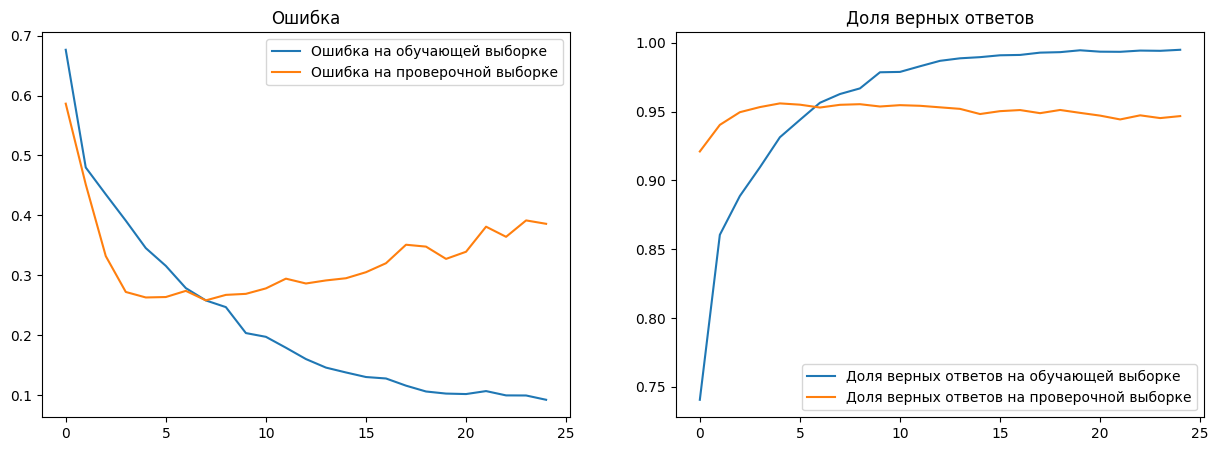

In [12]:
# График процесса обучения
plot_history(history1, 'loss', 'auc')

In [13]:
# Загрузка лучших весов
model.load_weights('./')

In [14]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['AUC'])

In [15]:
# Дообучение модели нейронной сети
history2 = model.fit({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train}, y_train,
                     validation_data=({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val}, y_val),
                     batch_size=48,
                     epochs=30,
                     verbose=1,
                     shuffle=True,
                     class_weight={0:class_weights[0], 1:class_weights[1]},
                     callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
103/104 [============================>.] - ETA: 0s - loss: 0.3136 - auc: 0.9445
Epoch 1: val_auc improved from 0.95600 to 0.95609, saving model to ./
104/104 [==============================] - 7s 31ms/step - loss: 0.3131 - auc: 0.9448 - val_loss: 0.2676 - val_auc: 0.9561
Epoch 2/30
101/104 [============================>.] - ETA: 0s - loss: 0.3116 - auc: 0.9451
Epoch 2: val_auc did not improve from 0.95609
104/104 [==============================] - 2s 17ms/step - loss: 0.3127 - auc: 0.9446 - val_loss: 0.2681 - val_auc: 0.9560
Epoch 3/30
103/104 [============================>.] - ETA: 0s - loss: 0.3147 - auc: 0.9443
Epoch 3: val_auc did not improve from 0.95609
104/104 [==============================] - 2s 16ms/step - loss: 0.3138 - auc: 0.9447 - val_loss: 0.2689 - val_auc: 0.9560
Epoch 4/30
103/104 [============================>.] - ETA: 0s - loss: 0.3028 - auc: 0.9491
Epoch 4: val_auc improved from 0.95609 to 0.95611, saving model to ./
104/104 [=============================

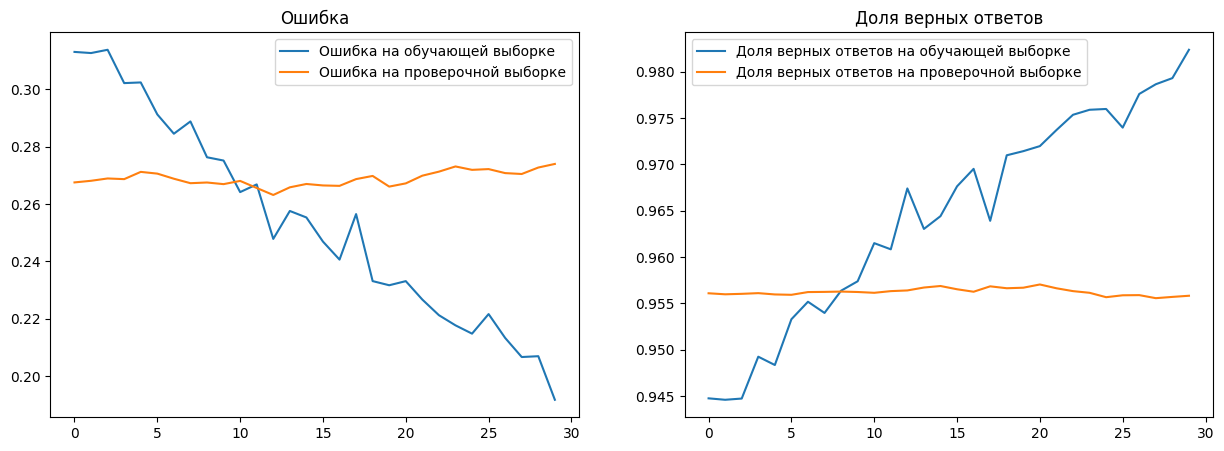

In [16]:
# График процесса обучения
plot_history(history2, 'loss', 'auc')

In [19]:
# Загрузка лучших весов
model.load_weights('./')

In [20]:
# Сохранение модели
model.save(model_path + 'model_tbl_auc.keras')

##### Проверка работы модели на обучающей выборке

In [21]:
# Оценка по метрике ROC-AUC
y_predict = model.predict({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train})
roc_auc = roc_auc_score(y_train, y_predict)
print(f'Точность на обучающей выборке по метрике ROC-AUC: {roc_auc:5.3f}')

156/156 [==============================] - 1s 4ms/step
Точность на обучающей выборке по метрике ROC-AUC: 0.995


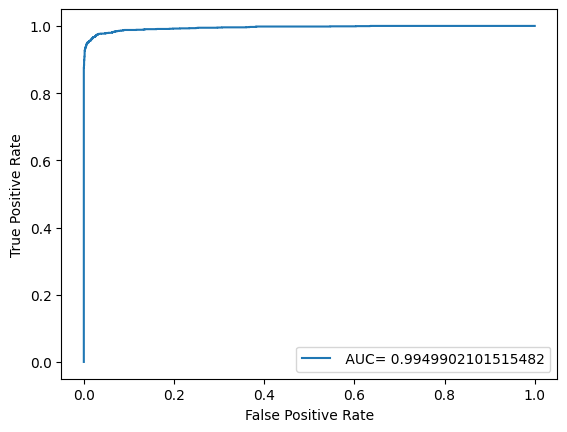

In [23]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_train, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [25]:
# Оптимальный порог
threshold = thresholds[np.argmax(tpr - fpr)]
print('Оптимальный порог:', threshold)

Оптимальный порог: 0.56281257


In [26]:
# Отчёт классификации
print(classification_report(y_train, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3327
           1       0.96      0.97      0.96      1659

    accuracy                           0.97      4986
   macro avg       0.97      0.97      0.97      4986
weighted avg       0.97      0.97      0.97      4986



##### Проверка работы модели на проверочной выборке

In [27]:
# Оценка по метрике ROC-AUC
y_predict = model.predict({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val})
roc_auc = roc_auc_score(y_val, y_predict)
print(f'Точность на проверочной выборке по метрике ROC-AUC: {roc_auc:5.3f}')

39/39 [==============================] - 0s 4ms/step
Точность на проверочной выборке по метрике ROC-AUC: 0.957


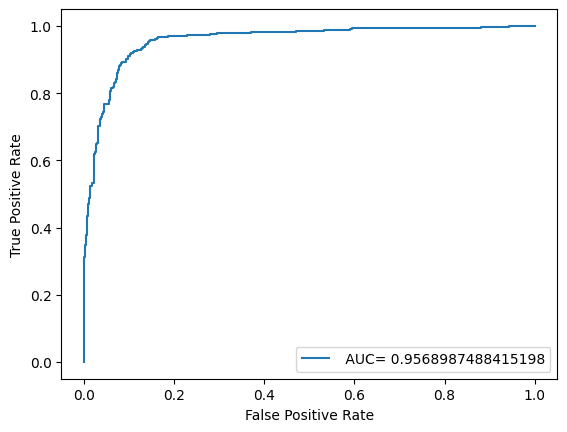

In [28]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_val, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [29]:
# Оптимальный порог
threshold = thresholds[np.argmax(tpr - fpr)]
print('Оптимальный порог:', threshold)

Оптимальный порог: 0.5386331


In [30]:
# Отчёт классификации
print(classification_report(y_val, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       832
           1       0.81      0.92      0.86       415

    accuracy                           0.90      1247
   macro avg       0.88      0.91      0.89      1247
weighted avg       0.91      0.90      0.90      1247



##### Проверка работы модели на тестовой выборке

In [31]:
# Оценка по метрике ROC-AUC
y_predict = model.predict({'input_x1': x_textdata_01_test, 'input_x2': x_ohedata_test, 'input_x3': x_numericdata_test})
roc_auc = roc_auc_score(y_test, y_predict)
print(f'Точность на тестовой выборке по метрике ROC-AUC: {roc_auc:5.3f}')

22/22 [==============================] - 0s 5ms/step
Точность на тестовой выборке по метрике ROC-AUC: 0.951


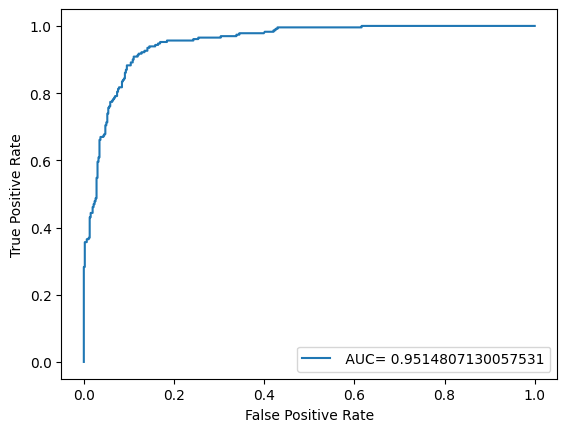

In [32]:
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label=' AUC= ' + str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [33]:
# Оптимальный порог
threshold = thresholds[np.argmax(tpr - fpr)]
print('Оптимальный порог:', threshold)

Оптимальный порог: 0.46345282


In [34]:
# Отчёт классификации
print(classification_report(y_test, (y_predict > threshold).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       461
           1       0.80      0.90      0.85       230

    accuracy                           0.89       691
   macro avg       0.88      0.90      0.88       691
weighted avg       0.90      0.89      0.90       691



### Метрика `accuracy`

In [35]:
# Создание модели нейронной сети
model = create_model([x_textdata_01_train.shape[1], x_ohedata_train.shape[1], x_numericdata_train.shape[1]])

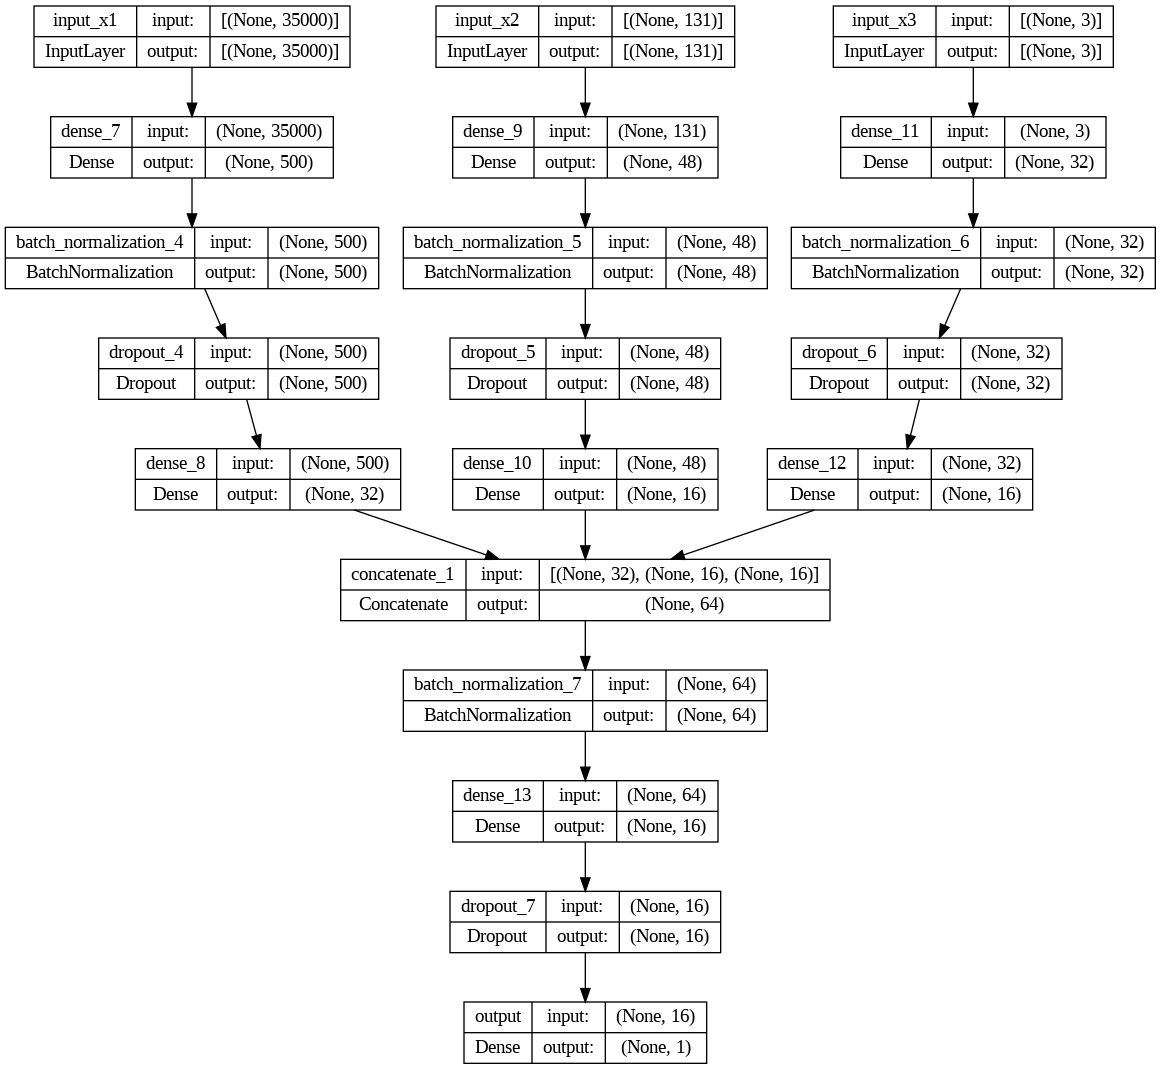

In [36]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [37]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_accuracy',
                                     patience=20)

In [38]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
# Обучение модели нейронной сети
history1 = model.fit({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train}, y_train,
                     validation_data=({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val}, y_val),
                     batch_size=32,
                     epochs=30,
                     verbose=1,
                     shuffle=True,
                     class_weight={0:class_weights[0], 1:class_weights[1]},
                     callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
153/156 [============================>.] - ETA: 0s - loss: 0.6645 - accuracy: 0.5780
Epoch 1: val_accuracy improved from -inf to 0.36167, saving model to ./
156/156 [==============================] - 9s 23ms/step - loss: 0.6637 - accuracy: 0.5802 - val_loss: 0.7231 - val_accuracy: 0.3617
Epoch 2/30
154/156 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.7025
Epoch 2: val_accuracy improved from 0.36167 to 0.75060, saving model to ./
156/156 [==============================] - 3s 18ms/step - loss: 0.5248 - accuracy: 0.7030 - val_loss: 0.5531 - val_accuracy: 0.7506
Epoch 3/30
156/156 [==============================] - ETA: 0s - loss: 0.4624 - accuracy: 0.7493
Epoch 3: val_accuracy improved from 0.75060 to 0.87650, saving model to ./
156/156 [==============================] - 5s 35ms/step - loss: 0.4624 - accuracy: 0.7493 - val_loss: 0.4053 - val_accuracy: 0.8765
Epoch 4/30
153/156 [============================>.] - ETA: 0s - loss: 0.3963 - accuracy: 0.807

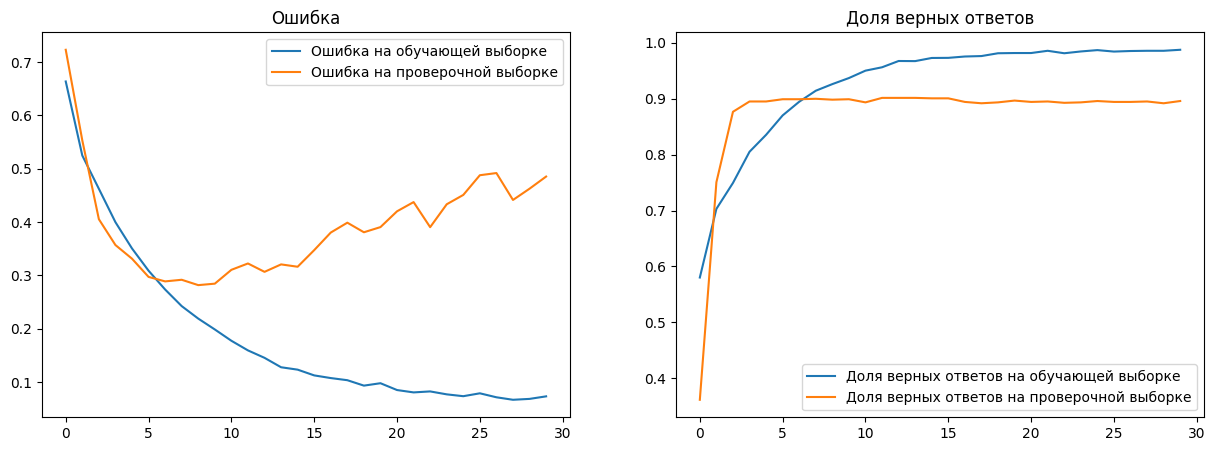

In [40]:
# График процесса обучения
plot_history(history1, 'loss', 'accuracy')

In [41]:
# Загрузка лучших весов
model.load_weights('./')

In [42]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
# Дообучение модели нейронной сети
history2 = model.fit({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train}, y_train,
                     validation_data=({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val}, y_val),
                     batch_size=48,
                     epochs=30,
                     verbose=1,
                     shuffle=True,
                     class_weight={0:class_weights[0], 1:class_weights[1]},
                     callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
104/104 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9685
Epoch 1: val_accuracy did not improve from 0.90136
104/104 [==============================] - 6s 23ms/step - loss: 0.1349 - accuracy: 0.9685 - val_loss: 0.3068 - val_accuracy: 0.8990
Epoch 2/30
104/104 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9719
Epoch 2: val_accuracy did not improve from 0.90136
104/104 [==============================] - 2s 16ms/step - loss: 0.1327 - accuracy: 0.9719 - val_loss: 0.3046 - val_accuracy: 0.8957
Epoch 3/30
102/104 [============================>.] - ETA: 0s - loss: 0.1332 - accuracy: 0.9708
Epoch 3: val_accuracy did not improve from 0.90136
104/104 [==============================] - 2s 19ms/step - loss: 0.1335 - accuracy: 0.9705 - val_loss: 0.3086 - val_accuracy: 0.8941
Epoch 4/30
102/104 [============================>.] - ETA: 0s - loss: 0.1310 - accuracy: 0.9694
Epoch 4: val_accuracy did not improve from 0.90136
104/104 [=======

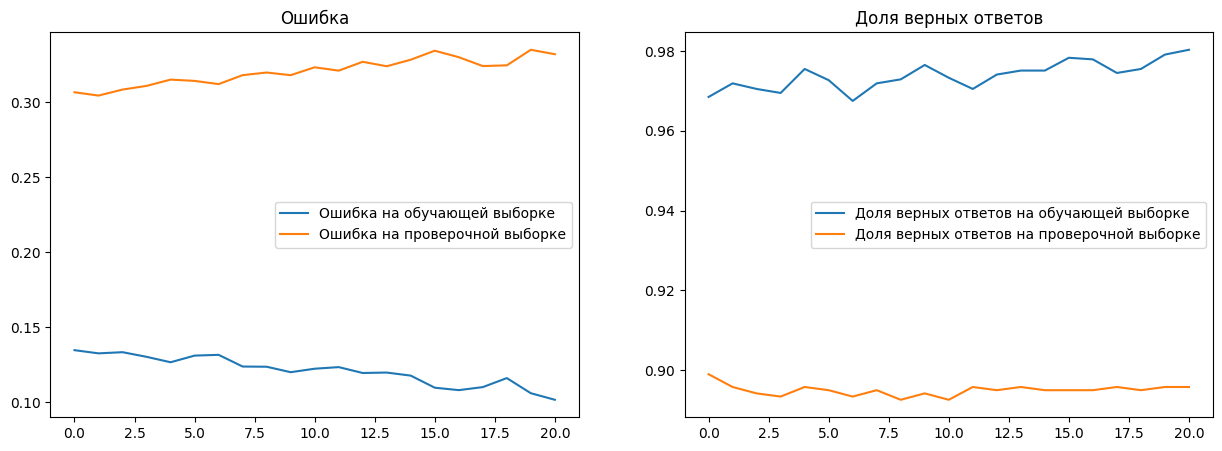

In [44]:
# График процесса обучения
plot_history(history2, 'loss', 'accuracy')

In [45]:
# Загрузка лучших весов
model.load_weights('./')

In [46]:
# Сохранение модели
model.save(model_path + 'model_tbl_acc.keras')

##### Проверка работы модели на обучающей выборке

In [47]:
# Оценка по метрике accuracy
y_predict = model.predict({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train})
accuracy = accuracy_score(y_train, np.rint(y_predict))
print(f'Точность на обучающей выборке по метрике accuracy: {accuracy:5.3f}')

156/156 [==============================] - 1s 6ms/step
Точность на обучающей выборке по метрике accuracy: 0.990


In [48]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3327
           1       0.99      0.98      0.98      1659

    accuracy                           0.99      4986
   macro avg       0.99      0.99      0.99      4986
weighted avg       0.99      0.99      0.99      4986



##### Проверка работы модели на проверочной выборке

In [49]:
# Оценка по метрике accuracy
y_predict = model.predict({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val})
accuracy = accuracy_score(y_val, np.rint(y_predict))
print(f'Точность на проверочной выборке по метрике accuracy: {accuracy:5.3f}')

39/39 [==============================] - 0s 5ms/step
Точность на проверочной выборке по метрике accuracy: 0.901


In [50]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       832
           1       0.82      0.90      0.86       415

    accuracy                           0.90      1247
   macro avg       0.88      0.90      0.89      1247
weighted avg       0.91      0.90      0.90      1247



##### Проверка работы модели на тестовой выборке

In [51]:
# Оценка по метрике accuracy
y_predict = model.predict({'input_x1': x_textdata_01_test, 'input_x2': x_ohedata_test, 'input_x3': x_numericdata_test})
accuracy = accuracy_score(y_test, np.rint(y_predict))
print(f'Точность на тестовой выборке по метрике accuracy: {accuracy:5.3f}')

22/22 [==============================] - 0s 4ms/step
Точность на тестовой выборке по метрике accuracy: 0.891


In [52]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       461
           1       0.82      0.87      0.84       230

    accuracy                           0.89       691
   macro avg       0.87      0.88      0.88       691
weighted avg       0.89      0.89      0.89       691



### Метрика `f1-score`

In [53]:
# Создание модели нейронной сети
model = create_model([x_textdata_01_train.shape[1], x_ohedata_train.shape[1], x_numericdata_train.shape[1]])

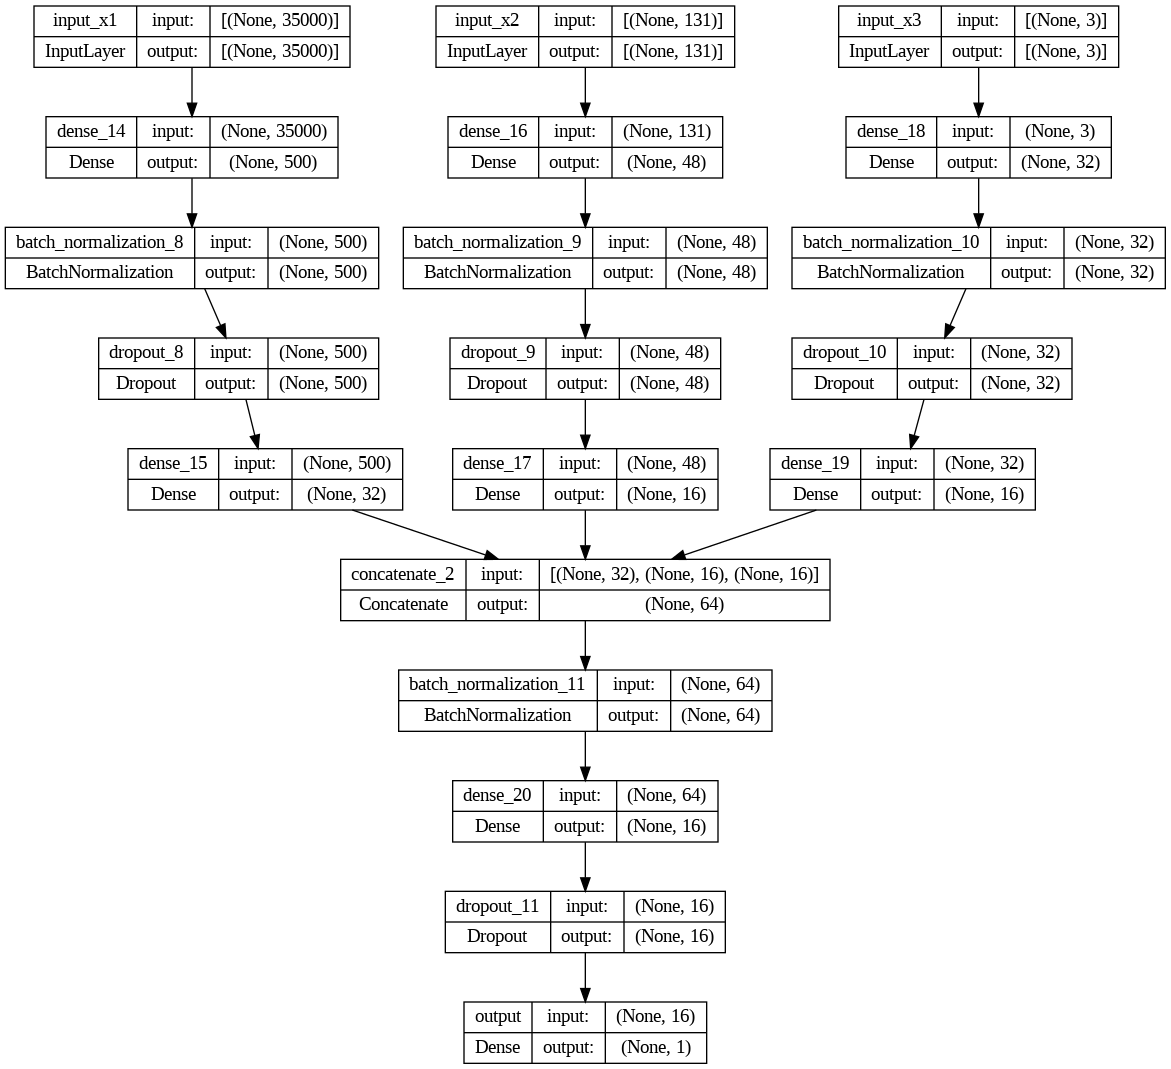

In [54]:
# Архитектура нейронной сети
plot_model(model, show_shapes=True)

In [59]:
# Коллбэки
save_best_callback = ModelCheckpoint(filepath='./',
                                     monitor='val_accuracy',
                                     verbose=1,
                                     mode='max',
                                     save_weights_only=True,
                                     save_best_only=True)
early_stop_callback =  EarlyStopping(monitor='val_accuracy',
                                     patience=20)

In [60]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=1),'accuracy'])

In [61]:
# Обучение модели нейронной сети
history1 = model.fit({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train}, y_train,
                     validation_data=({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val}, y_val),
                     batch_size=32,
                     epochs=30,
                     verbose=1,
                     shuffle=True,
                     class_weight={0:class_weights[0], 1:class_weights[1]},
                     callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
156/156 [==============================] - ETA: 0s - loss: 0.7199 - f1_score: 0.4993 - accuracy: 0.7072
Epoch 1: val_accuracy improved from -inf to 0.69126, saving model to ./
156/156 [==============================] - 10s 27ms/step - loss: 0.7199 - f1_score: 0.4993 - accuracy: 0.7072 - val_loss: 0.6047 - val_f1_score: 0.4994 - val_accuracy: 0.6913
Epoch 2/30
155/156 [============================>.] - ETA: 0s - loss: 0.5082 - f1_score: 0.4995 - accuracy: 0.7770
Epoch 2: val_accuracy improved from 0.69126 to 0.80192, saving model to ./
156/156 [==============================] - 3s 20ms/step - loss: 0.5077 - f1_score: 0.4993 - accuracy: 0.7774 - val_loss: 0.4794 - val_f1_score: 0.4994 - val_accuracy: 0.8019
Epoch 3/30
156/156 [==============================] - ETA: 0s - loss: 0.4597 - f1_score: 0.4993 - accuracy: 0.8026
Epoch 3: val_accuracy improved from 0.80192 to 0.86528, saving model to ./
156/156 [==============================] - 5s 31ms/step - loss: 0.4597 - f1_score: 0

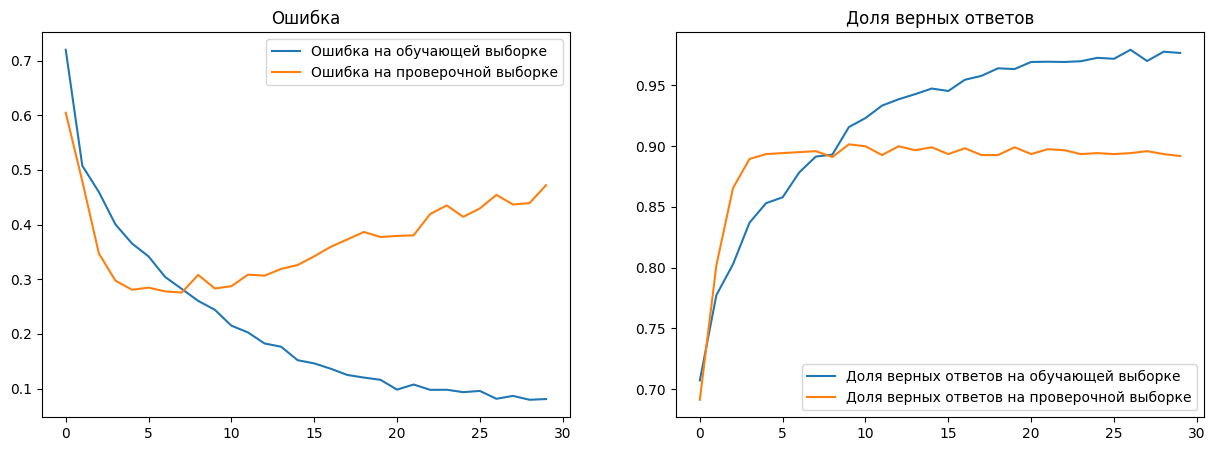

In [62]:
# График процесса обучения
plot_history(history1, 'loss', 'accuracy')

In [63]:
# Загрузка лучших весов
model.load_weights('./')

In [64]:
# Компиляция модели нейронной сети
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=[tfa.metrics.F1Score(num_classes=1),'accuracy'])

In [65]:
# Дообучение модели нейронной сети
history2 = model.fit({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train}, y_train,
                     validation_data=({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val}, y_val),
                     batch_size=48,
                     epochs=30,
                     verbose=1,
                     shuffle=True,
                     class_weight={0:class_weights[0], 1:class_weights[1]},
                     callbacks=[save_best_callback, early_stop_callback])

Epoch 1/30
104/104 [==============================] - ETA: 0s - loss: 0.2222 - f1_score: 0.4993 - accuracy: 0.9268
Epoch 1: val_accuracy did not improve from 0.90136
104/104 [==============================] - 6s 24ms/step - loss: 0.2222 - f1_score: 0.4993 - accuracy: 0.9268 - val_loss: 0.2913 - val_f1_score: 0.4994 - val_accuracy: 0.8982
Epoch 2/30
101/104 [============================>.] - ETA: 0s - loss: 0.2142 - f1_score: 0.5005 - accuracy: 0.9226
Epoch 2: val_accuracy did not improve from 0.90136
104/104 [==============================] - 2s 19ms/step - loss: 0.2130 - f1_score: 0.4993 - accuracy: 0.9222 - val_loss: 0.2973 - val_f1_score: 0.4994 - val_accuracy: 0.8933
Epoch 3/30
102/104 [============================>.] - ETA: 0s - loss: 0.2178 - f1_score: 0.4993 - accuracy: 0.9218
Epoch 3: val_accuracy did not improve from 0.90136
104/104 [==============================] - 2s 20ms/step - loss: 0.2182 - f1_score: 0.4993 - accuracy: 0.9218 - val_loss: 0.3019 - val_f1_score: 0.4994 - v

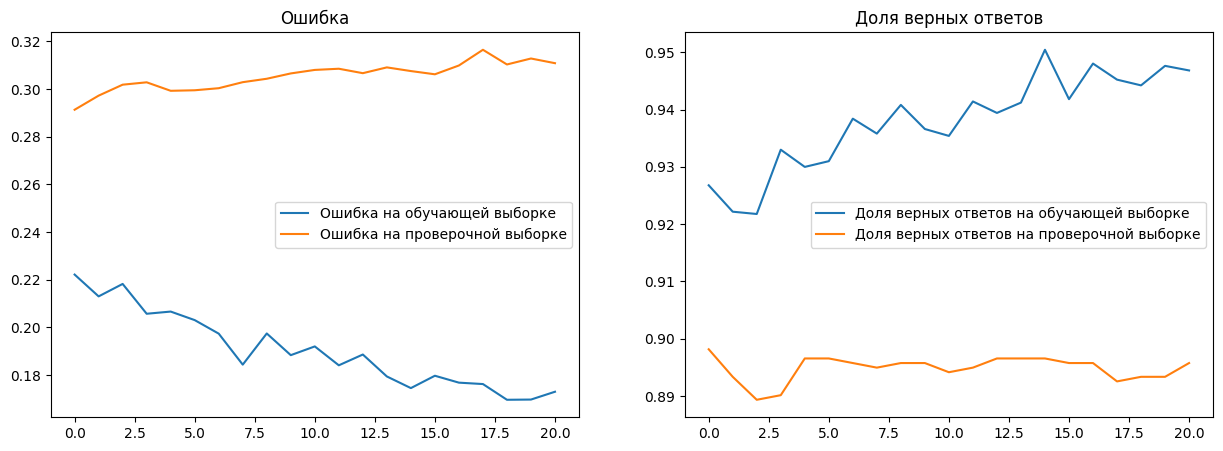

In [66]:
# График процесса обучения
plot_history(history2, 'loss', 'accuracy')

In [67]:
# Загрузка лучших весов
model.load_weights('./')

In [68]:
# Сохранение модели
model.save(model_path + 'model_tbl_f1.keras')

##### Проверка работы модели на обучающей выборке

In [69]:
# Оценка по метрике accuracy
y_predict = model.predict({'input_x1': x_textdata_01_train, 'input_x2': x_ohedata_train, 'input_x3': x_numericdata_train})
accuracy = accuracy_score(y_train, np.rint(y_predict))
print(f'Точность на обучающей выборке по метрике accuracy: {accuracy:5.3f}')

156/156 [==============================] - 1s 4ms/step
Точность на обучающей выборке по метрике accuracy: 0.981


In [70]:
# Отчёт классификации
print(classification_report(y_train, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3327
           1       0.97      0.98      0.97      1659

    accuracy                           0.98      4986
   macro avg       0.98      0.98      0.98      4986
weighted avg       0.98      0.98      0.98      4986



##### Проверка работы модели на проверочной выборке

In [71]:
# Оценка по метрике accuracy
y_predict = model.predict({'input_x1': x_textdata_01_val, 'input_x2': x_ohedata_val, 'input_x3': x_numericdata_val})
accuracy = accuracy_score(y_val, np.rint(y_predict))
print(f'Точность на проверочной выборке по метрике accuracy: {accuracy:5.3f}')

39/39 [==============================] - 0s 4ms/step
Точность на проверочной выборке по метрике accuracy: 0.901


In [72]:
# Отчёт классификации
print(classification_report(y_val, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       832
           1       0.81      0.93      0.86       415

    accuracy                           0.90      1247
   macro avg       0.88      0.91      0.89      1247
weighted avg       0.91      0.90      0.90      1247



##### Проверка работы модели на тестовой выборке

In [73]:
# Оценка по метрике accuracy
y_predict = model.predict({'input_x1': x_textdata_01_test, 'input_x2': x_ohedata_test, 'input_x3': x_numericdata_test})
accuracy = accuracy_score(y_test, np.rint(y_predict))
print(f'Точность на тестовой выборке по метрике accuracy: {accuracy:5.3f}')

22/22 [==============================] - 0s 4ms/step
Точность на тестовой выборке по метрике accuracy: 0.890


In [74]:
# Отчёт классификации
print(classification_report(y_test, np.rint(y_predict)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       461
           1       0.80      0.90      0.84       230

    accuracy                           0.89       691
   macro avg       0.87      0.89      0.88       691
weighted avg       0.90      0.89      0.89       691

